# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [423]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [424]:
mall_df = pd.read_csv('C:/Users/Simplon/Desktop/PROJET_COMMERCIAL/Mall_customers.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [425]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [426]:
mall_df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [427]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

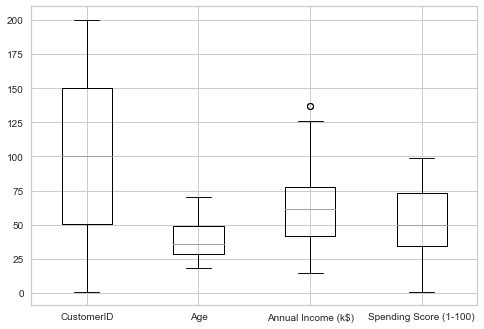

In [428]:
mall_df.boxplot()

array([[<AxesSubplot:xlabel='CustomerID', ylabel='CustomerID'>,
        <AxesSubplot:xlabel='Age', ylabel='CustomerID'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='CustomerID'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='CustomerID'>],
       [<AxesSubplot:xlabel='CustomerID', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<AxesSubplot:xlabel='CustomerID', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<AxesSubplot:xlabel='CustomerID', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Annual Incom

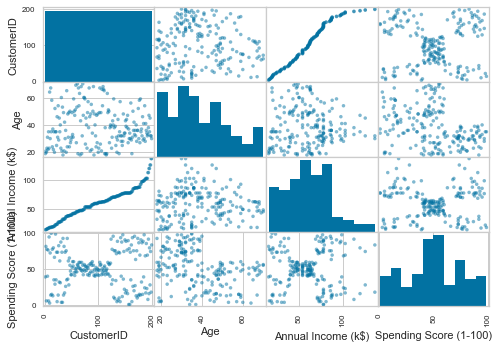

In [429]:
#sns.pairplot(mall_df)
pd.plotting.scatter_matrix(mall_df)
# CustomerID suit une loi uniforme continue donc on doit le supprimer 


array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>]],
      dtype=object)

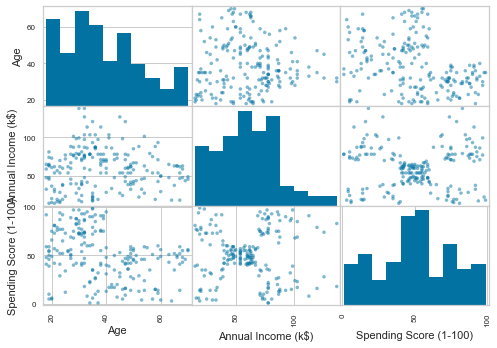

In [430]:
pd.plotting.scatter_matrix(mall_df.drop('CustomerID',axis=1))

In [ ]:
#pas des correlation entre les varaibles
#on peut avoir que les variables Spending Score (1-100) et Annual Income (k$) sont trés importants

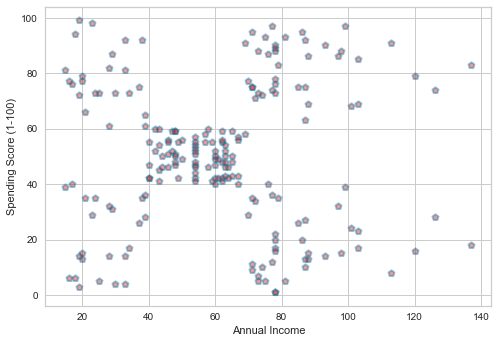

In [431]:
#une évaluation rapide , il y a cinq clusters là-bas et donc cinq segments 
#ou types de clients pour lesquels on peut planifier

plt.scatter(mall_df['Annual Income (k$)'], mall_df['Spending Score (1-100)'], marker='p', s=40, facecolor='r', edgecolor='b', 
            linewidth=2, alpha=0.4)
 
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)

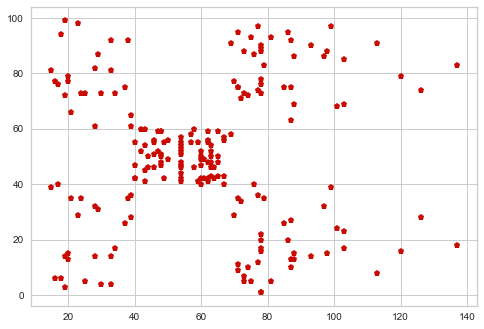

In [432]:
#il faut bien centrer et réduire les données numériques  parce que l'algo de kmeans basé sur des distances
X=mall_df.iloc[:,[3,4]]
plt.plot(X.values[:,0],X.values[:,1],'rp')

In [433]:
scaler = StandardScaler()
XS=scaler.fit_transform(X)

In [434]:
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(XS, test_size=0.2, random_state=1)

# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

# kmeans

C:\Users\Simplon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


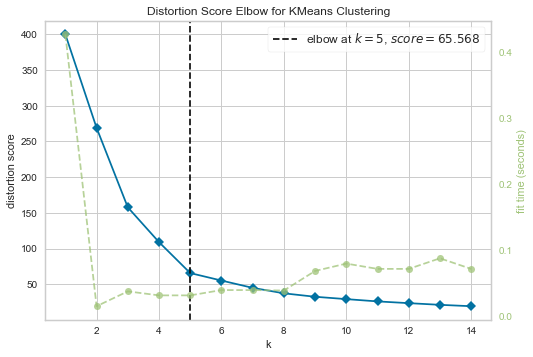

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [435]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))
visualizer.fit(XS)      
visualizer.show()



[0.29689692 0.46761358 0.49319631 0.553932   0.53976103 0.52881045
 0.45851336 0.45650773 0.4476098 ]


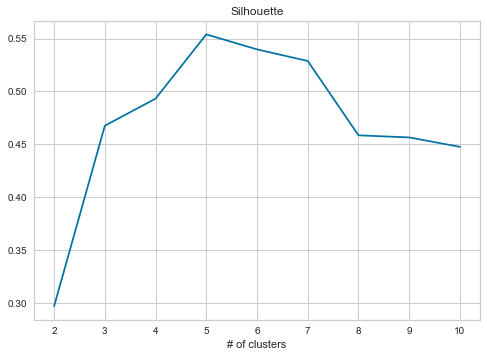

In [436]:
#librairie pour évaluation des partitions
from sklearn import cluster
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res=np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(X)
    res[k] = metrics.silhouette_score(X,km.labels_)
print(res)
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [437]:
model = KMeans(n_clusters=5,init='k-means++').fit(X_train)
ypred=model.labels_
# ou ypred= model.predict(kmeans)
silhouette_score(X_train,ypred)

0.5648297985695725

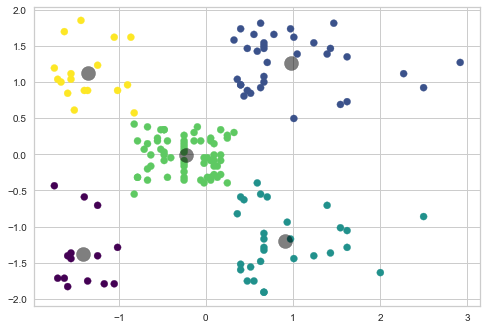

In [438]:
plt.scatter(X_train[:,0],X_train[:,1],c=ypred, s=50, cmap='viridis')
centers = model.cluster_centers_ 
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

In [439]:
#pour tester le model
ypred_test= model.predict(X_test)

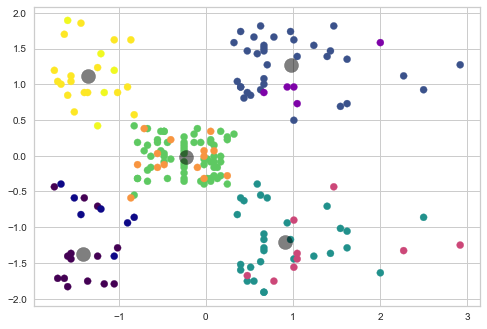

In [440]:
plt.scatter(X_train[:,0],X_train[:,1],c=ypred, s=50, cmap='viridis')
centers = model.cluster_centers_ 
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.scatter(X_test[:,0],X_test[:,1],c=ypred_test, s=50, cmap='plasma')
centers = model.cluster_centers_ 
#plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

# Dendrogam

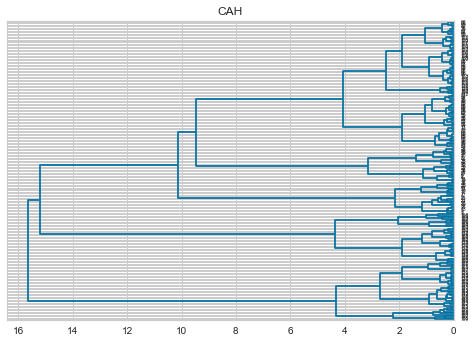

In [441]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#générer la matrice des liens
Z = linkage(XS,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=clients.index,orientation='left',color_threshold=0)
plt.show()


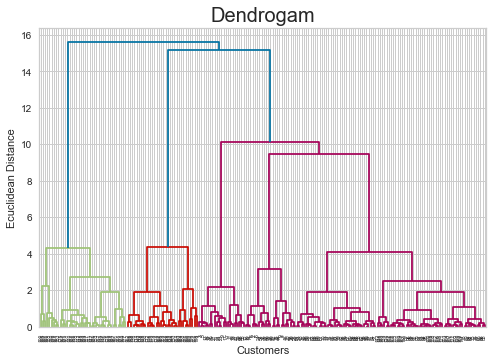

In [442]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(XS, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

# ACP

In [443]:
#copy
le = preprocessing.LabelEncoder()

mall_df["Gender"]=le.fit_transform(mall_df["Gender"])
scaled_features = mall_df.copy()
scaled_features=scaled_features.drop('CustomerID', axis=1)
#Specify columns to scale
col_names = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

#introducing scaled values to df
scaled_features[col_names] = features
X=scaled_features

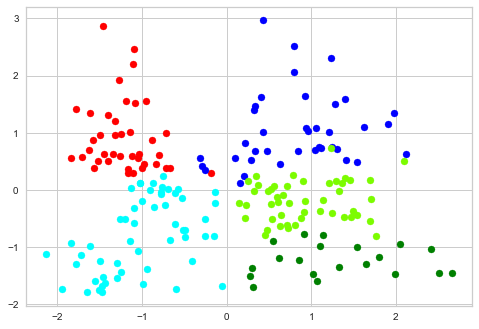

In [444]:
#ACP
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(X)
plt.scatter(acp[kmeansed.labels_==k,0],acp[kmeansed.labels_==k,1],c=couleur)
#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe
#remarquer le rôle de zip() dans la boucle
for couleur,k in zip(['red','blue','lawngreen','aqua','green'],[0,1,2,3,4]):
    plt.scatter(acp[kmeansed.labels_==k,0],acp[kmeansed.labels_==k,1],c=couleur)
plt.show() 

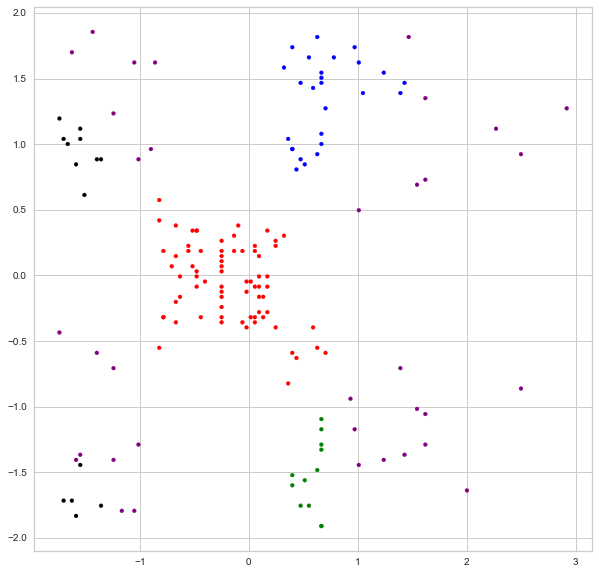

In [445]:
from sklearn.cluster import DBSCAN
modeldb=DBSCAN(eps = 0.3, min_samples=5)
modeldb.fit(X_train)
y_pred=modeldb.labels_ 
colors=['purple','red','blue','green','black']
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,0],X_train[:,1],c=y_pred,cmap=matplotlib.colors.ListedColormap(colors),s=15)

In [446]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib
dbscan=DBSCAN(eps = 0.3, min_samples=5)
dbscan.fit(XS)

DBSCAN(eps=0.3)

In [447]:
ydb=dbscan.labels_ 



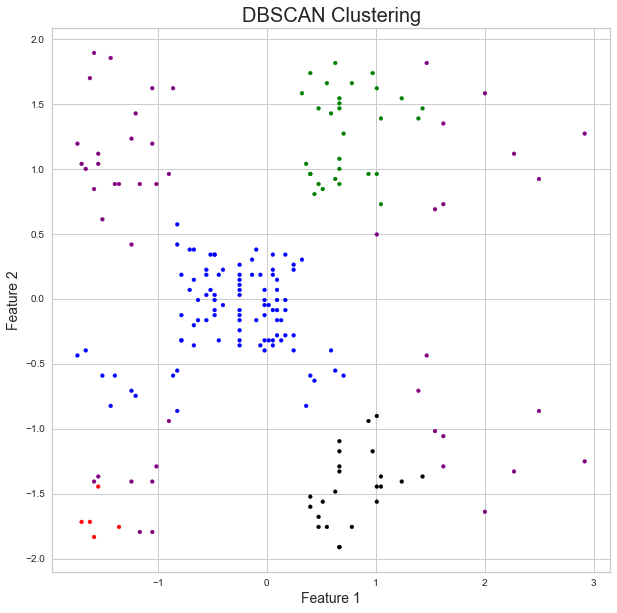

In [448]:
# Plotting resulting clusters
colors=['purple','red','blue','green','black']
plt.figure(figsize=(10,10))
plt.scatter(XS[:,0],XS[:,1],c=ydb,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

##  calcule Epsilon

In [449]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(XS)
distances, indices = nbrs.kneighbors(XS)

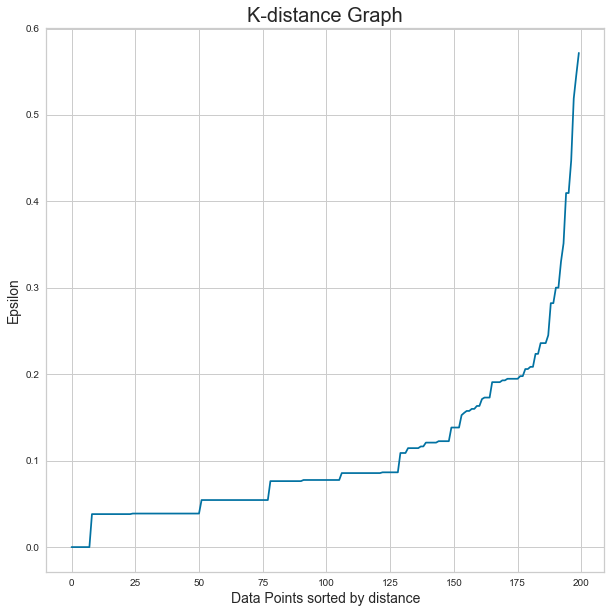

In [450]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

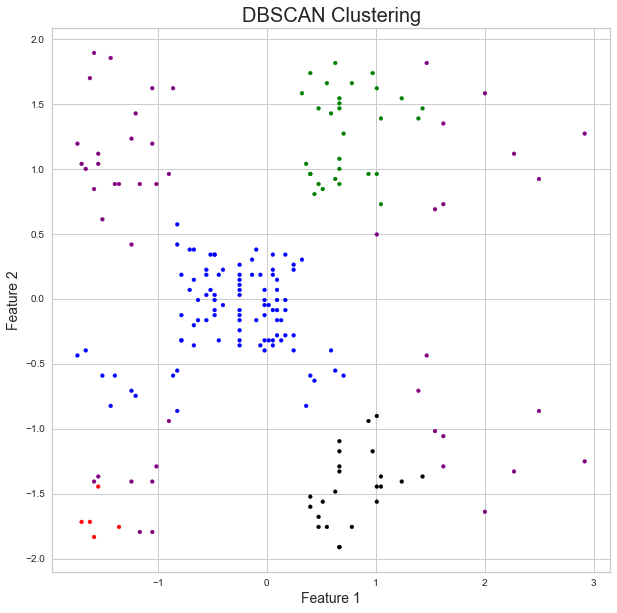

In [451]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib
dbscan=DBSCAN(eps = 0.3, min_samples=5)
dbscan.fit(XS)
ypred=dbscan.labels_ 
# Plotting resulting clusters
colors=['purple','red','blue','green','black']
plt.figure(figsize=(10,10))
plt.scatter(XS[:,0],XS[:,1],c=ypred,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Agglomerative 

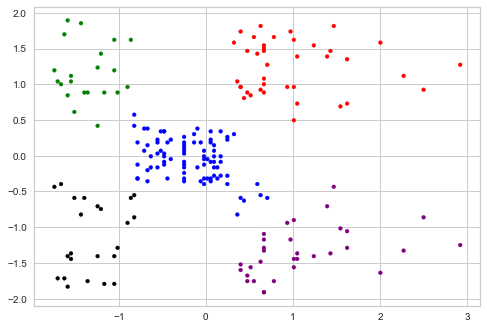

In [457]:
from sklearn.cluster import AgglomerativeClustering
#colors=['purple','red','blue','green']
colors=['purple','red','blue','green','black']
clustering = AgglomerativeClustering(n_clusters=5).fit(XS)
y=clustering.labels_
plt.scatter(XS[:,0],XS[:,1],c=y,cmap=matplotlib.colors.ListedColormap(colors),s=15)


In [458]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
#
# define the model
model = GaussianMixture(n_components=2,max_iter=100)
# fit the model
model.fit(XS)
# assign a cluster to each example
yhat = model.predict(XS)
# retrieve unique clusters
clusters = unique(yhat)
clusters 

array([0, 1], dtype=int64)

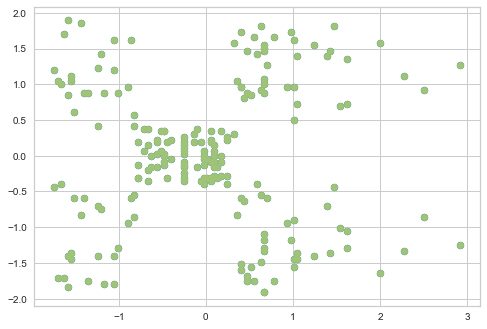

In [461]:
# create scatter plot for samples from each cluster
for cluster in clusters:
# get row indexes for samples with this cluster
    ow_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(XS[row_ix, 0], XS[row_ix, 1])
# show the plot
pyplot.show()


# Conclusions